In [1]:
import tensorflow.keras as keras
import pandas as pd

train_df = pd.read_csv(r"C:\Users\allen\Downloads\sign_mnist_train.csv")
valid_df = pd.read_csv(r"C:\Users\allen\Downloads\sign_mnist_train.csv")

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

x_train = train_df.values
x_valid = valid_df.values

num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

x_train = x_train / 255
x_valid = x_valid / 255


x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

C:\Users\allen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

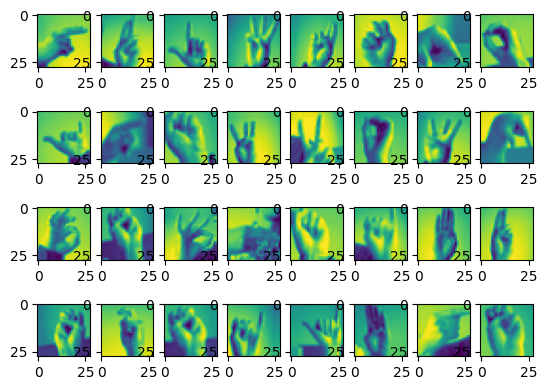

In [4]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()


In [5]:
datagen.fit(x_train)

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)//batch_size,  # Use integer division
          validation_data=(x_valid, y_valid))


Epoch 1/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 29:50 2s/step - accuracy: 0.0625 - loss: 4.0621

C:\Users\allen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 110s 126ms/step - accuracy: 0.4626 - loss: 1.7678 - val_accuracy: 0.6810 - val_loss: 1.0193
Epoch 2/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 5:27 383ms/step - accuracy: 0.8750 - loss: 0.5192

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


857/857 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8750 - loss: 0.2599 - val_accuracy: 0.6738 - val_loss: 0.9834
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 109s 126ms/step - accuracy: 0.8732 - loss: 0.3693 - val_accuracy: 0.9320 - val_loss: 0.2061
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9375 - loss: 0.0898 - val_accuracy: 0.9759 - val_loss: 0.0895
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 93s 94ms/step - accuracy: 0.9249 - loss: 0.2261 - val_accuracy: 0.9798 - val_loss: 0.0598
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9688 - loss: 0.0445 - val_accuracy: 0.9885 - val_loss: 0.0349
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 98s 114ms/step - accuracy: 0.9490 - loss: 0.1547 - val_accuracy: 0.9801 - val_loss: 0.0683
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9688 - loss: 0.0551 - val_accuracy: 0.9865 - val_loss: 0.0474
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 122s 112ms/step - accuracy: 0.9565 - loss: 0.1255 - val_ac

In [8]:
model.save('asl_model.h5')

In [9]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 